# Movie Recommendation System

### Content based

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cols='user_id item_id ratings timestamp'.split()

In [5]:
df=pd.read_csv('u.data',sep='\t',names=cols)
df.head()

,user_id,item_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   ratings    100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
df.describe()

,user_id,item_id,ratings,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [8]:
cols_movie=[str(i) for i in range(24)]
movies_title=pd.read_csv('u.item',sep='|',names=cols_movie)
movies_title.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# merging or concatinating
# pd.merge
# pd.concat

In [10]:
movies_title.shape

(1682, 24)

In [11]:
df.shape

(100000, 4)

In [12]:
cols_movie=['item_id', 'title']+[str(i) for i in range(22)]
movies_title=pd.read_csv('u.item',sep='|',names=cols_movie)
movies_title.head()

,item_id,title,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
movies_title=movies_title[['item_id', 'title']]
movies_title.sample(5)

,item_id,title
1474,1475,Bhaji on the Beach (1993)
1119,1120,I'm Not Rappaport (1996)
1197,1198,Purple Noon (1960)
2,3,Four Rooms (1995)
47,48,Hoop Dreams (1994)


In [14]:
data=pd.merge(df,movies_title,on='item_id')
data.sample(10)

,user_id,item_id,ratings,timestamp,title
60829,524,161,4,884637095,Top Gun (1986)
90199,548,1025,4,891043278,Fire Down Below (1997)
52741,804,732,4,879445037,Dave (1993)
14151,407,154,5,875116964,Monty Python's Life of Brian (1979)
59610,308,692,3,887738469,"American President, The (1995)"
3197,130,118,4,874953895,Twister (1996)
23685,399,2,3,882512708,GoldenEye (1995)
33982,566,576,2,881651013,Cliffhanger (1993)
54196,699,370,3,879148129,Mary Reilly (1996)
64848,474,92,4,887927509,True Romance (1993)


## Exploratory Data Analysis (EDA)

In [15]:
# COUNT HOW MUCH TIME AA MOVIES IS RATED

In [16]:
data['title'].value_counts()

Star Wars (1977)               583
Contact (1997)                 509
Fargo (1996)                   508
Return of the Jedi (1983)      507
Liar Liar (1997)               485
                              ... 
Butterfly Kiss (1995)            1
Johns (1996)                     1
Modern Affair, A (1995)          1
Stefano Quantestorie (1993)      1
Fear, The (1995)                 1
Name: title, Length: 1664, dtype: int64

In [17]:
data['title'].value_counts().mean()

60.09615384615385

In [18]:
# groupby
data.groupby('title')['ratings'].mean().head(10)

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
Name: ratings, dtype: float64

In [19]:
data.groupby('title')['ratings'].mean().sort_values(ascending=False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [21]:
rating = pd.DataFrame(data.groupby('title')['ratings'].mean())
rating.head()


,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [23]:
rating['count'] = data['title'].value_counts()
rating.head()


,ratings,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [24]:
sum(rating['count']<10)


520

Text(0, 0.5, 'Frequency-->')

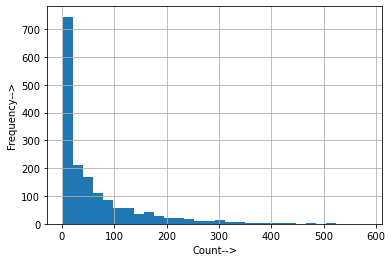

In [27]:
rating['count'].hist(bins=30)
plt.xlabel('Count-->')
plt.ylabel('Frequency-->')

In [29]:
pivot_df = data.pivot_table(index = 'user_id', columns = 'title', values = 'ratings')
pivot_df.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [31]:
rating.sort_values('count', ascending = False).head(10)

,ratings,count
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [32]:
sw_ratings = pivot_df['Star Wars (1977)']

In [33]:
sw_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [34]:
pivot_df['1-900 (1994)'].mean()

2.6

In [35]:
similarity_sw = pivot_df.corrwith(sw_ratings)

C:\Users\kriti\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kriti\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [36]:
similarity_sw

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [37]:
corr_df = pd.DataFrame(similarity_sw, columns = ['Correlation'])

In [45]:
corr_df.dropna(inplace=True)
corr_df.sort_values('Correlation')

,Correlation,count
title,,
Frankie Starlight (1995),-1.0,4
Roseanna's Grave (For Roseanna) (1997),-1.0,5
Two Deaths (1995),-1.0,4
I Like It Like That (1994),-1.0,3
Theodore Rex (1995),-1.0,5
...,...,...
Cosi (1996),1.0,4
Commandments (1997),1.0,3
Hollow Reed (1996),1.0,6


In [48]:
corr_df[corr_df['count']>200].sort_values(by='Correlation',ascending=False).head(30)


,Correlation,count
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
L.A. Confidential (1997),0.319065,297
E.T. the Extra-Terrestrial (1982),0.303619,300
Batman (1989),0.289344,201


In [49]:
ter_ratings = pivot_df['Terminator 2: Judgment Day (1991)']
similarity_ter = pivot_df.corrwith(ter_ratings)
corr_df_ter = pd.DataFrame(similarity_ter, columns = ['Correlation'])
corr_df_ter.dropna(inplace=True)
corr_df_ter = corr_df_ter.join(rating['count'])
corr_df_ter[corr_df_ter['count']>200].sort_values(by='Correlation',ascending=False).head(3)


C:\Users\kriti\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kriti\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
True Lies (1994),0.516728,208


In [50]:
corr_df_ter[(corr_df_ter['count']>200)&(corr_df_ter['Correlation']>0.55)].sort_values(by='Correlation',ascending=False)


,Correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301


# GUI

In [1]:
import tkinter as tk

In [10]:
app = tk.Tk()
app.title('Recommender System')
app.geometry('350x200')

tk.Label(app, text='Movie You watched:').place(x=25,y=25)
tk.Label(app, text='Recommended movies:').place(x=25,y=100)
tk.Label(app, text='Try These:').place(x=25,y=125)

movie_var = tk.Variable(app)
tk.Entry(app, textvariable=movie_var, width=28).place(x=150,y=25)

recommend_var = tk.Variable(app)
recommend_var.set('Type movie name..')
tk.Label(app, textvariable=recommend_var).place(x=150,y=100)

also_try_var = tk.Variable(app)
also_try_var.set('Type movie name..')
tk.Label(app, textvariable=also_try_var).place(x=150,y=125)

def find_recommendation():
    pass

tk.Button(app, text='Find Suggestion', command=find_recommendation).place(x=125,y=60)


app.mainloop()

In [17]:
cols = 'user_id item_id rating timestamp'.split()
df = pd.read_csv('u.data',sep='\t',names=cols)
cols_movies = ['item_id', 'title']+[str(i) for i in range(22)]
movie_titles = pd.read_csv('u.item',sep='|', names = cols_movies)
movie_titles = movie_titles[['item_id','title']]
data = pd.merge(df,movie_titles, on='item_id')
rating = pd.DataFrame(data.groupby('title')['rating'].mean())
rating['count'] = data['title'].value_counts()
pivot_df = data.pivot_table(index = 'user_id', columns = 'title', values = 'rating')

app = tk.Tk()
app.title('Recommender System')
app.geometry('350x200')

# Creating Labels
tk.Label(app, text='Movie You Watched:').place(x=25,y=25)
tk.Label(app, text='Recommended:').place(x=25,y=100)
tk.Label(app, text='Also try:').place(x=25,y=125)

movie_var = tk.Variable(app)
tk.Entry(app, textvariable=movie_var, width=28).place(x=150,y=25)

recommend_var = tk.Variable(app)
recommend_var.set('Type movie name..')
tk.Entry(app, textvariable=recommend_var).place(x=150,y=100)

also_try_var = tk.Variable(app)
also_try_var.set('Type movie name..')
tk.Entry(app, textvariable=also_try_var).place(x=150,y=125)

def find_recommendation():
    movie = movie_var.get().lower().strip()
    if movie:
        try:
            movie = movie_titles['title'][movie_titles['title'].apply(lambda x: movie in x.lower())].values[0]
            movie_var.set(movie)
        except IndexError:
            recommend_var.set('Movie Not Found')
            also_try_var.set('Movie Not Found')
        else:
            corr_df = pd.DataFrame(pivot_df.corrwith(pivot_df[movie]), columns = ['Correlation'])
            corr_df.dropna(inplace=True)
            corr_df = corr_df.join(rating['count'])
            recommend_var.set(corr_df[(corr_df['count']>200)&(corr_df['Correlation']>0.4)].sort_values(by='Correlation',ascending=False).index[1])
            also_try_var.set(corr_df[corr_df['Correlation']>0.4].sort_values(by='Correlation',ascending=False).index[0])
        
tk.Button(app, text='Find Suggestion', command=find_recommendation, bg='#ee0033',fg='#ffffff').place(x=125,y=60)

app.mainloop()